
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [1]:

import numpy as np
import matplotlib.pyplot as plt


In [ ]:


class StandardScalerManual:
    def fit(self, X):
        X = np.asarray(X, dtype=float)
        self.mean_ = X.mean(axis=0)
        self.std_ = X.std(axis=0)
        self.std_[self.std_ == 0] = 1.0
        return self

    def transform(self, X):
        X = np.asarray(X, dtype=float)
        return (X - self.mean_) / self.std_

    def fit_transform(self, X):
        return self.fit(X).transform(X)


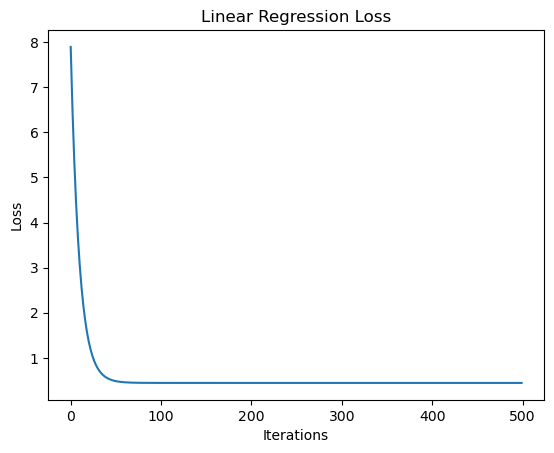

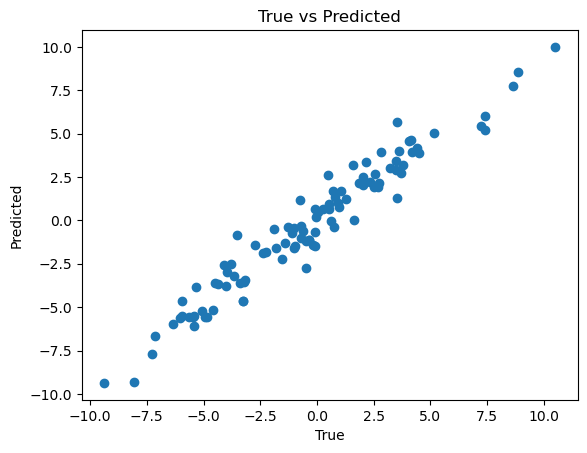

In [3]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda 
# try to implement L1 regularization or atlease read about it and where it is used

class LinearRegressionManual:
    def __init__(self, lr=0.05, epochs=500):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0.0
        self.losses = []

        for _ in range(self.epochs):
            y_pred = X @ self.w + self.b
            error = y_pred - y

            dw = (1/m) * (X.T @ error)
            db = (1/m) * np.sum(error)

            self.w -= self.lr * dw
            self.b -= self.lr * db

            loss = (1/(2*m)) * np.sum(error**2)
            self.losses.append(loss)

    def predict(self, X):
        return X @ self.w + self.b

np.random.seed(0)
X = np.random.randn(100, 2)
y = 3*X[:,0] - 2*X[:,1] + np.random.randn(100)

scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

model = LinearRegressionManual()
model.fit(X_scaled, y)

plt.plot(model.losses)
plt.title("Linear Regression Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

y_pred = model.predict(X_scaled)
plt.scatter(y, y_pred)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("True vs Predicted")
plt.show()



## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [4]:

#Implement sigmoid function as told in the lectures 
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

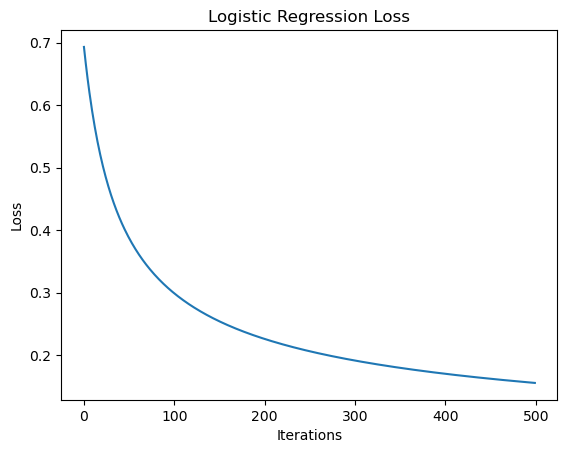

Final Accuracy: 0.985


In [5]:

#Implement Logistic Regression from scratch and here also add the regularizaation term 


class LogisticRegressionManual:
    def __init__(self, lr=0.1, epochs=500):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0.0
        self.losses = []

        for _ in range(self.epochs):
            z = X @ self.w + self.b
            y_hat = sigmoid(z)

            dw = (1/m) * (X.T @ (y_hat - y))
            db = (1/m) * np.sum(y_hat - y)

            self.w -= self.lr * dw
            self.b -= self.lr * db

            loss = -(1/m) * np.sum(
                y*np.log(y_hat+1e-9) + (1-y)*np.log(1-y_hat+1e-9)
            )
            self.losses.append(loss)

    def predict(self, X):
        return (sigmoid(X @ self.w + self.b) >= 0.5).astype(int)
np.random.seed(1)
X = np.random.randn(200, 2)
y = (X[:,0] + X[:,1] > 0).astype(int)

X_scaled = scaler.fit_transform(X)

clf = LogisticRegressionManual()
clf.fit(X_scaled, y)

plt.plot(clf.losses)
plt.title("Logistic Regression Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

y_pred = clf.predict(X_scaled)
print("Final Accuracy:", np.mean(y_pred == y))


## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [6]:

import numpy as np

def kmeans_matrix(M, k, max_iters=100, tol=1e-4):
    values = M.reshape(-1, 1)
    centroids = values[np.random.choice(len(values), k, replace=False)]

    for _ in range(max_iters):
        distances = np.abs(values - centroids.T)
        labels = np.argmin(distances, axis=1)

        new_centroids = np.array([values[labels == i].mean() for i in range(k)]).reshape(-1,1)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids

    assignment = labels.reshape(M.shape)
    cookbook = {i: list(zip(*np.where(assignment == i))) for i in range(k)}
    return assignment, cookbook, centroids.flatten()

M = np.random.rand(5,5)
assignment, cookbook, centroids = kmeans_matrix(M, k=3)

print("Assignment Table:\n", assignment)
print("Centroids:", centroids)
print("Cookbook:", cookbook)


Assignment Table:
 [[2 0 2 1 1]
 [2 1 1 2 0]
 [0 0 2 2 1]
 [0 1 1 1 2]
 [2 2 0 2 2]]
Centroids: [0.09120249 0.90387382 0.52092629]
Cookbook: {0: [(np.int64(0), np.int64(1)), (np.int64(1), np.int64(4)), (np.int64(2), np.int64(0)), (np.int64(2), np.int64(1)), (np.int64(3), np.int64(0)), (np.int64(4), np.int64(2))], 1: [(np.int64(0), np.int64(3)), (np.int64(0), np.int64(4)), (np.int64(1), np.int64(1)), (np.int64(1), np.int64(2)), (np.int64(2), np.int64(4)), (np.int64(3), np.int64(1)), (np.int64(3), np.int64(2)), (np.int64(3), np.int64(3))], 2: [(np.int64(0), np.int64(0)), (np.int64(0), np.int64(2)), (np.int64(1), np.int64(0)), (np.int64(1), np.int64(3)), (np.int64(2), np.int64(2)), (np.int64(2), np.int64(3)), (np.int64(3), np.int64(4)), (np.int64(4), np.int64(0)), (np.int64(4), np.int64(1)), (np.int64(4), np.int64(3)), (np.int64(4), np.int64(4))]}



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
